# Etch Tool

Under the current state of this tool one can
* Extract density and perimeter values from dies located in GDS files
* Average die data
* Arrange dies on a wafer

## Step 1: Analyze die from GDS files

In [1]:
%matplotlib notebook
import numpy as np
import copy
import matplotlib.pyplot as plt
from helper_funcs import analyzeGDS
import os.path
from gdsCAD import *
from helper_funcs import *

In [2]:
gdsFile = 'output.gds'  # gds file to be analyzed
minPt = [0,0]           # min bounds of die in gds file
maxPt = [10000,10000]   # max bounds of die in gds file
windowSize = 50         # size of nxn (micrometers) window used when analyzing die
windowResolution = 100  # pxp pixel resolution of the nxn window
outputFile = 'success2' # file to save dictionary output to

#### Die Preview:

<IPython.core.display.Javascript object>


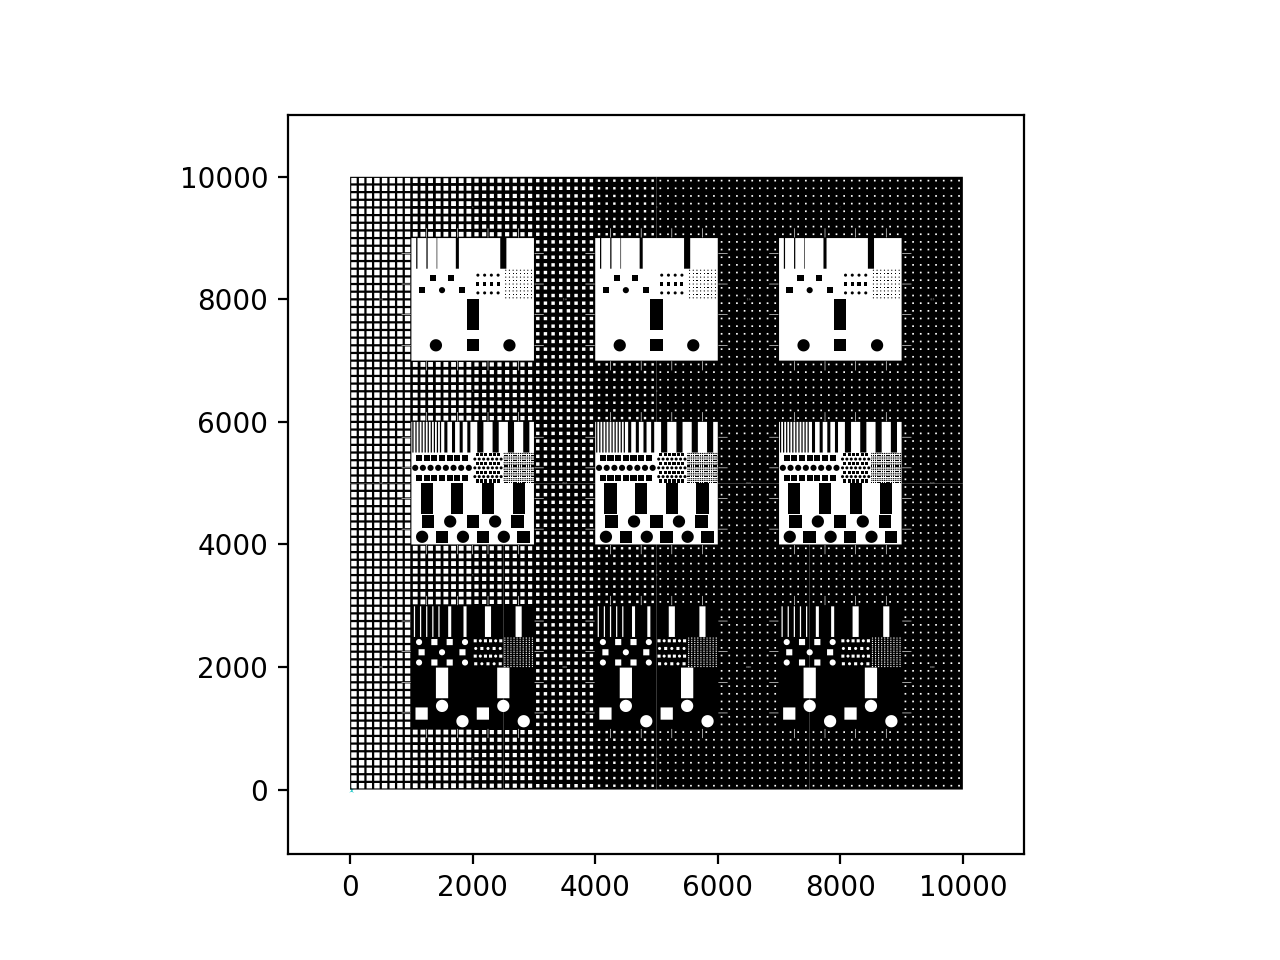

In [3]:
dieLayout = core.GdsImport(gdsFile)
plt.figure()
ax = dieLayout.show()

#### Extract Data From File: (May take some time)

In [4]:
# dieData = analyzeGDS(gdsFile, minXY, maxPt, windowSize, windowResolution, outputFile)

#### Load Already Processed Data:

In [5]:
dieData = load_obj(outputFile)

#### Data Contents

In [6]:
# dieData = {
#         "filename":filename,
#         "minPt":minPt,
#         "maxPt":maxPt,
#         "windowSize":windowSize,
#         "windowResolution":windowResolution,
#         "perimeter":perimeter matrix,
#         "density":density matrix,
#         "isAveraged": True if averaged
#     }

#### Display Density Data

<IPython.core.display.Javascript object>


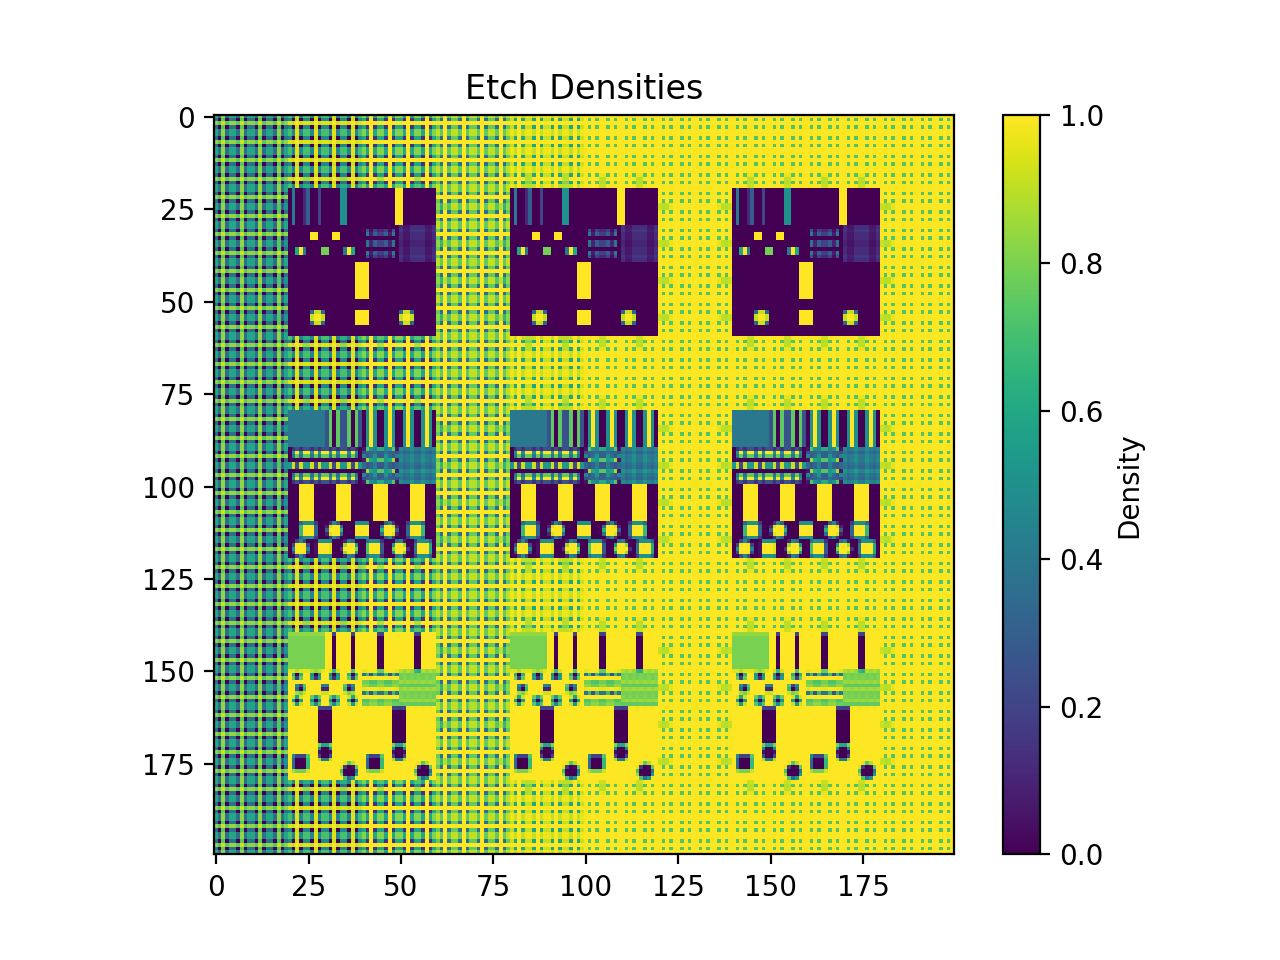

In [7]:
fig1 = plt.figure()
imgplot = plt.imshow(dieData['density'])
cbar = fig1.colorbar(imgplot)
cbar.set_label("Density")
plt.title("Etch Densities")
plt.show()

#### Display Perimeter Data

<IPython.core.display.Javascript object>


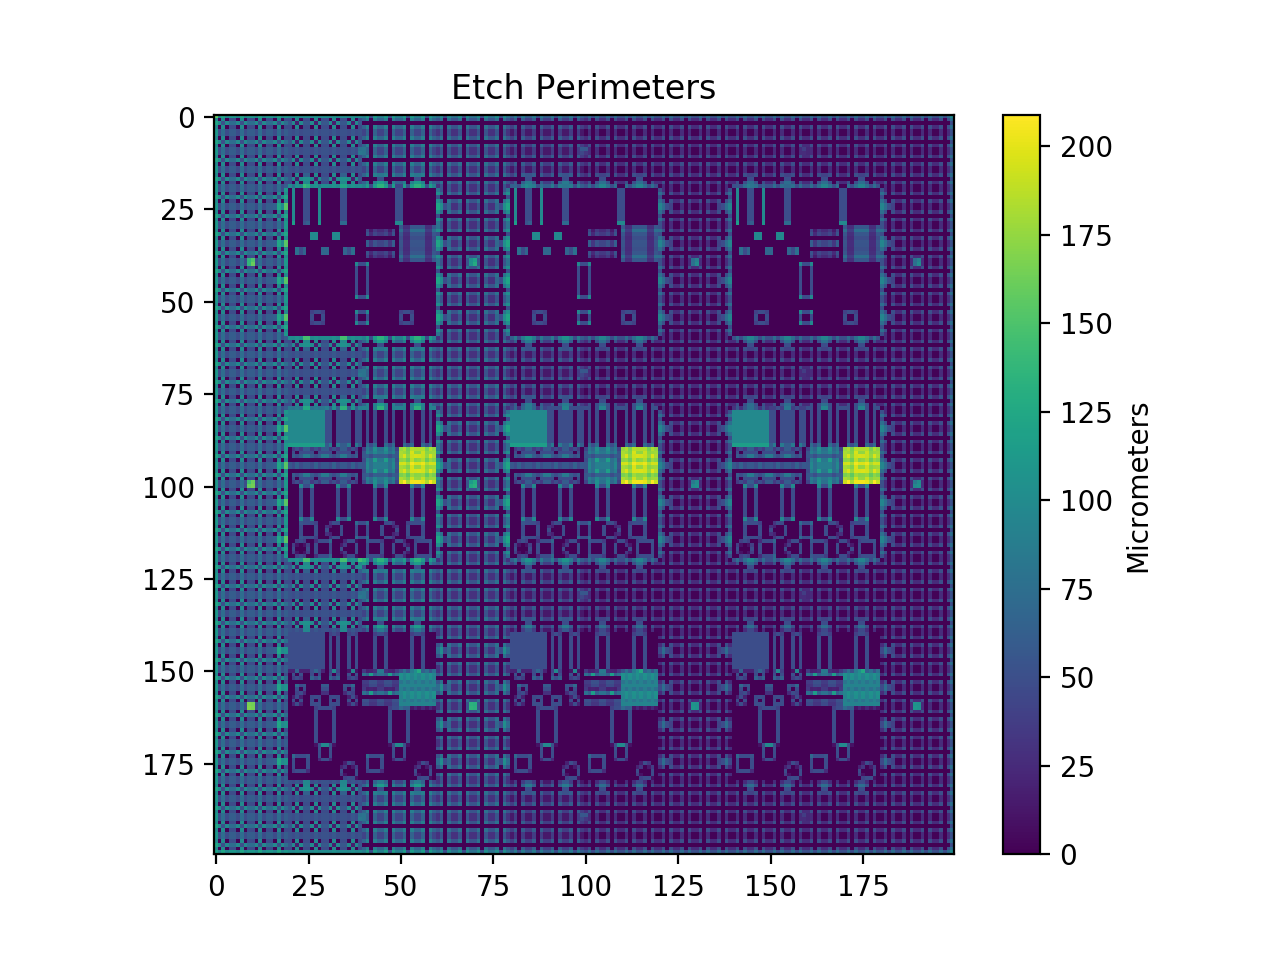

In [8]:
perimScaling = float(dieData['windowSize'])/dieData['windowResolution'] # scales perimeter values to micrometers
fig2 = plt.figure()
imgplot = plt.imshow(dieData['perimeter']*perimScaling)
cbar = fig2.colorbar(imgplot)
cbar.set_label("Micrometers")
plt.title("Etch Perimeters")
plt.show()

## Step 2: Pool Values

In [9]:
poolWindow = 20 #Window used to average densities and sum perimeters
avgDieData = copy.deepcopy(dieData)
avgDieData = avgData(avgDieData, 20)

#### Display Averaged Density Data

<IPython.core.display.Javascript object>


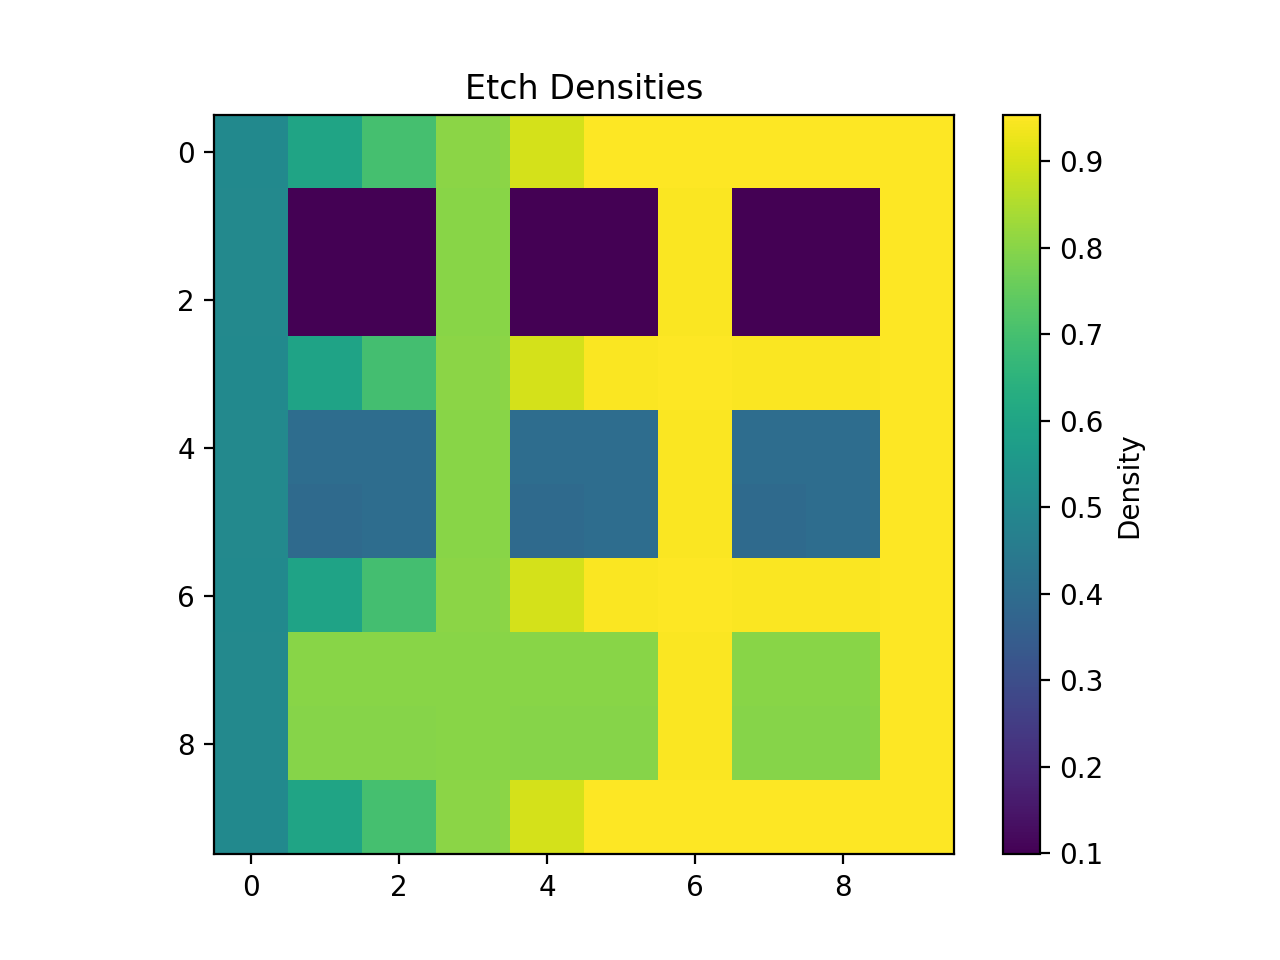

In [10]:
fig3 = plt.figure()
imgplot = plt.imshow(avgDieData['density'])
cbar = fig3.colorbar(imgplot)
cbar.set_label("Density")
plt.title("Etch Densities")
plt.show()

#### Display Summed Perimeter Data

<IPython.core.display.Javascript object>


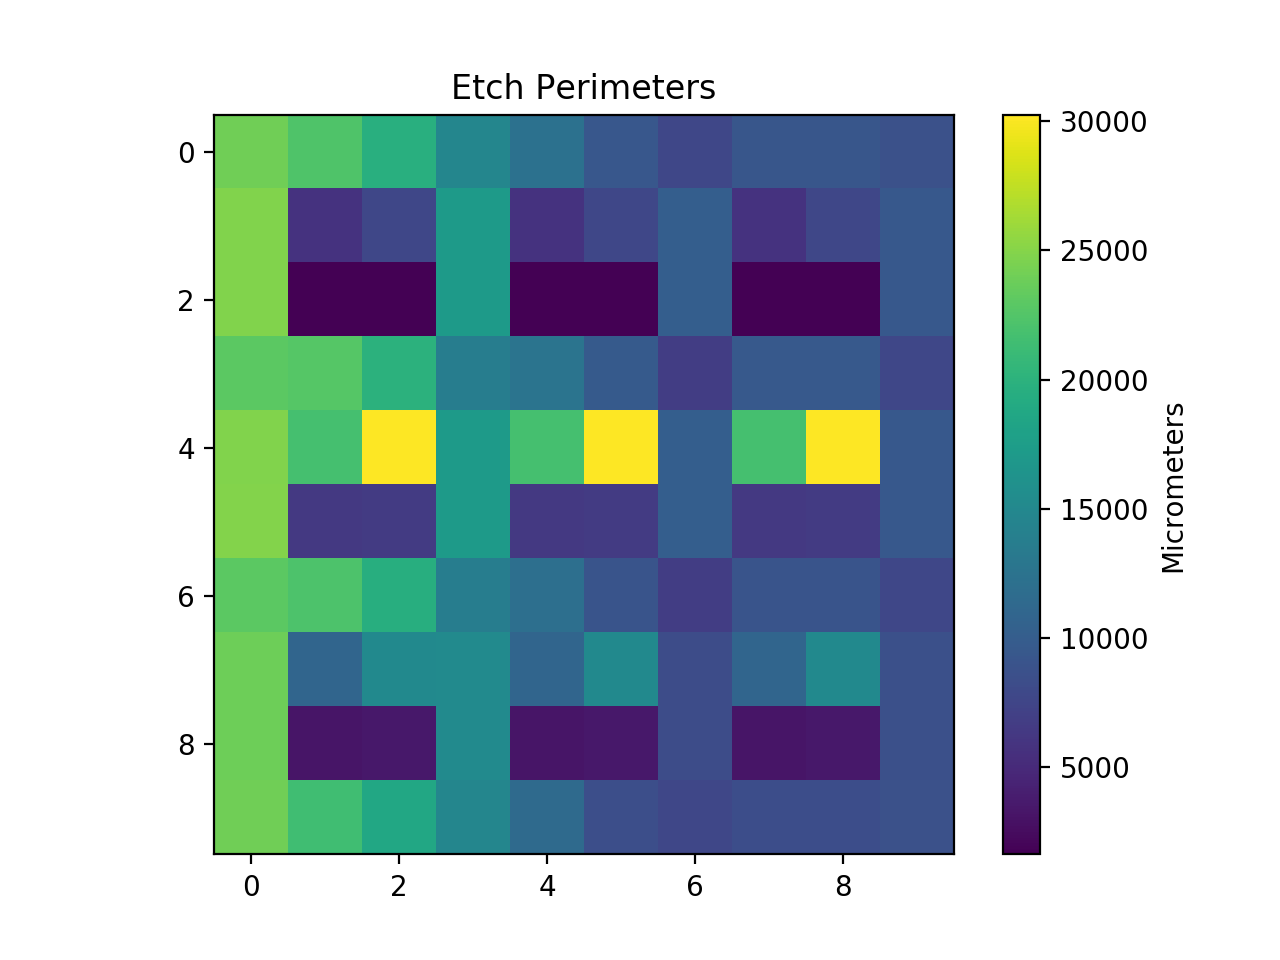

In [11]:
perimScaling = float(dieData['windowSize'])/dieData['windowResolution'] #scales perimeter values to micrometers
fig4 = plt.figure()
imgplot = plt.imshow(avgDieData['perimeter']*perimScaling)
cbar = fig4.colorbar(imgplot)
cbar.set_label("Micrometers")
plt.title("Etch Perimeters")
plt.show()

## Step 3: Arrange Dies on a Wafer

#### A) Completely fill a wafer of a given diameter

<IPython.core.display.Javascript object>


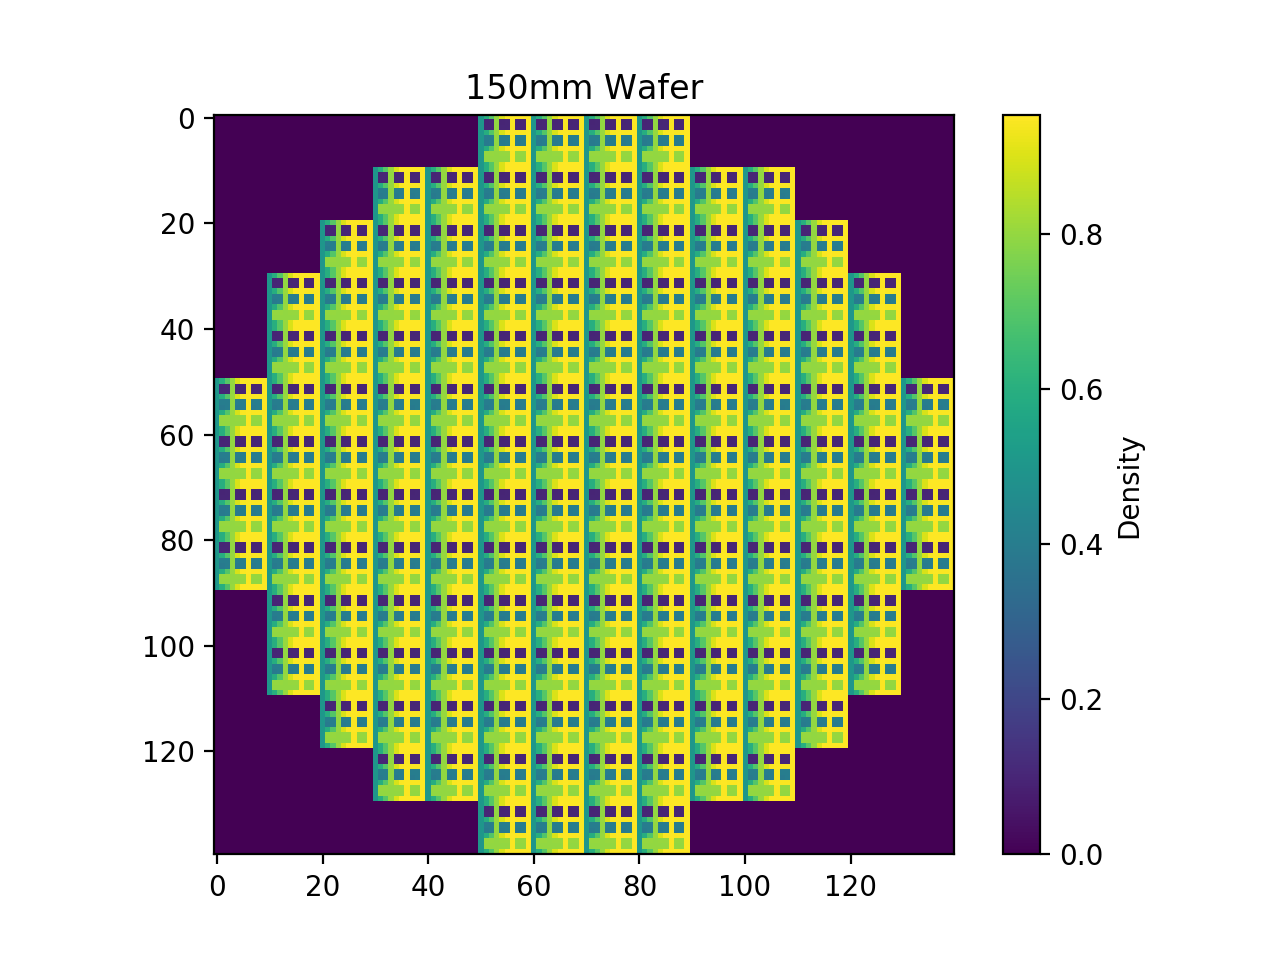

In [22]:
waferDiameter = 150 # wafer diameter in mm
filledWafer = fillWafer(avgDieData, waferDiameter)
fig5 = plt.figure()
imgplot = plt.imshow(filledWafer)
cbar = fig5.colorbar(imgplot)
cbar.set_label("Density")
plt.title(str(waferDiameter)+"mm Wafer")
plt.show()

#### B) Select which spots of the wafer grid to fill

<IPython.core.display.Javascript object>


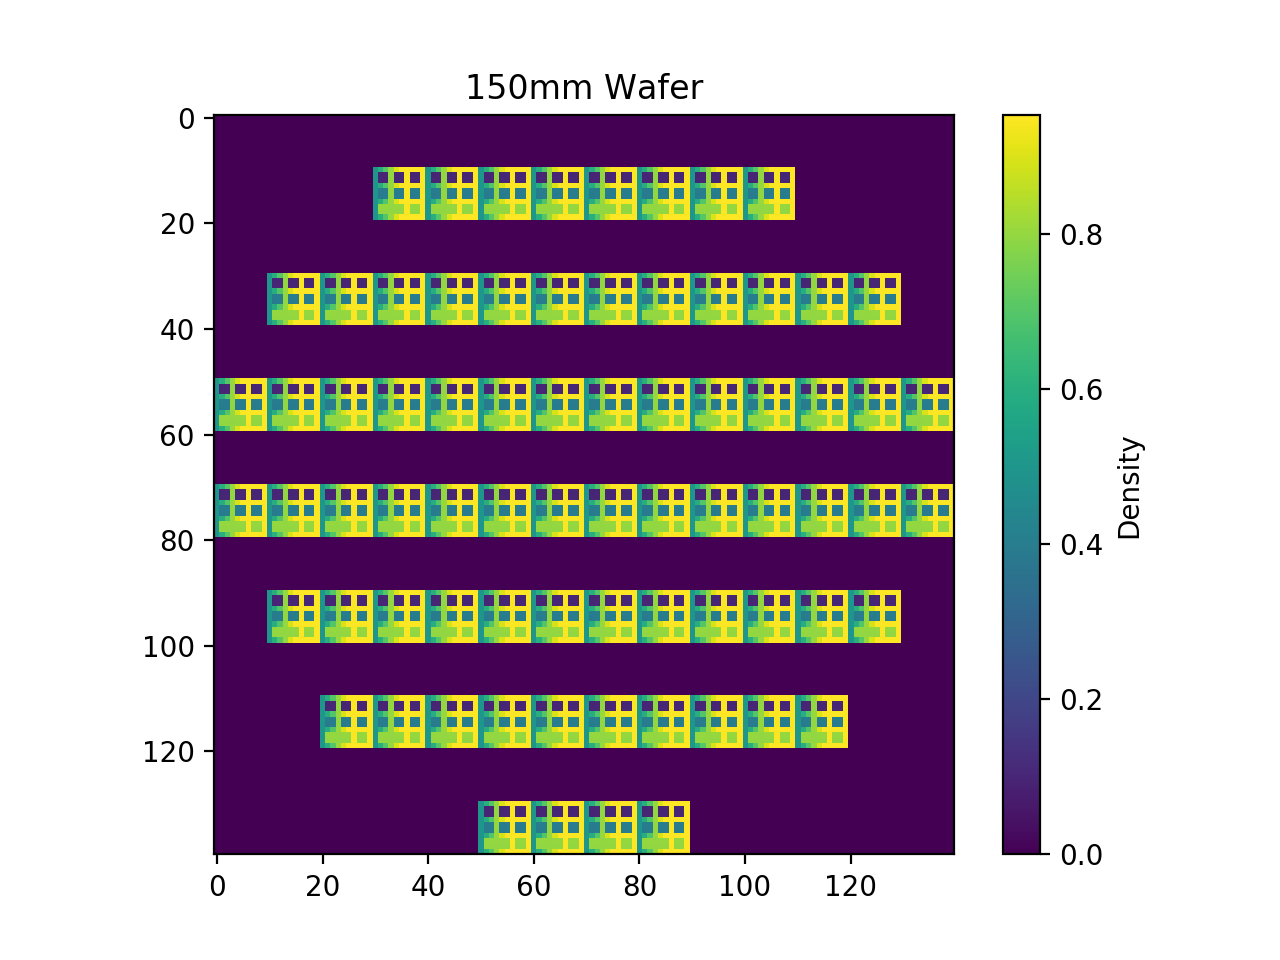

In [13]:
waferGrid = dieWaferGrid(avgDieData, waferDiameter)
waferGrid[::2] = 0
sparseWafer = setWafer([avgDieData], waferGrid)
fig6 = plt.figure()
imgplot = plt.imshow(sparseWafer)
cbar = fig6.colorbar(imgplot)
cbar.set_label("Density")
plt.title(str(waferDiameter)+"mm Wafer")
plt.show()

#### C) Populate wafer with various dies of the same (array) size

In [14]:
dieData = load_obj('success3')
poolWindow = 20 #Window used to average densities and sum perimeters
avgDieData2 = copy.deepcopy(dieData)
avgDieData2 = avgData(avgDieData2, 20)

<IPython.core.display.Javascript object>


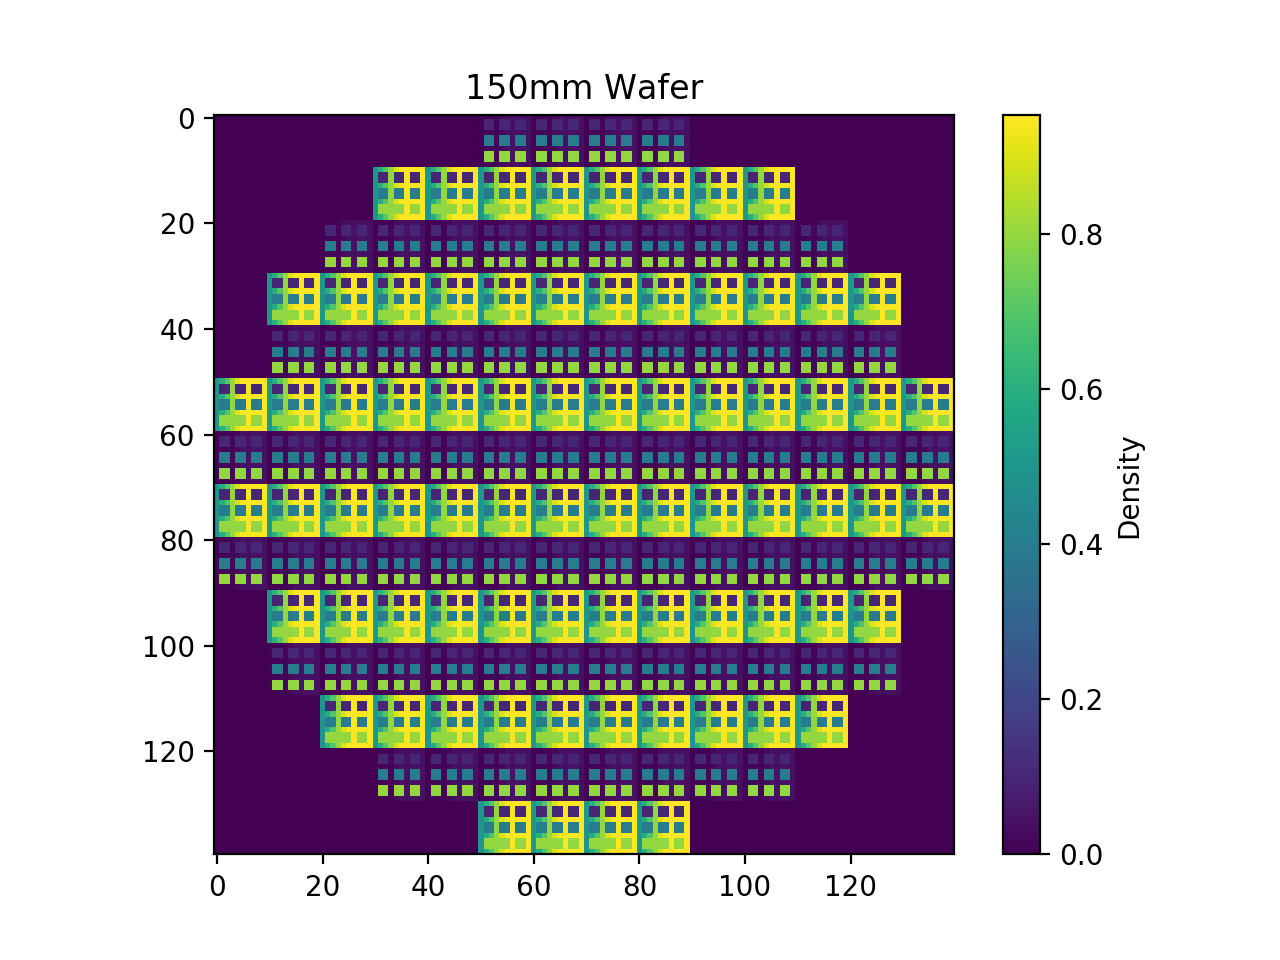

In [15]:
waferGrid = dieWaferGrid(avgDieData, waferDiameter)
waferGrid = waferGrid.astype(int)
waferGrid[::2] = waferGrid[::2]*2
sparseWafer = setWafer([avgDieData,avgDieData2], waferGrid)
fig7 = plt.figure()
imgplot = plt.imshow(sparseWafer)
cbar = fig7.colorbar(imgplot)
cbar.set_label("Density")
plt.title(str(waferDiameter)+"mm Wafer")
plt.show()